In [9]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/christophbleyer/Technician-Vehicle-Routing-Optimization')
from alns.Problem import Problem
from alns.TVRPAlgorithms import *
from alns.ALNS import ALNS
from alns.criteria import HillClimbing, SimulatedAnnealing

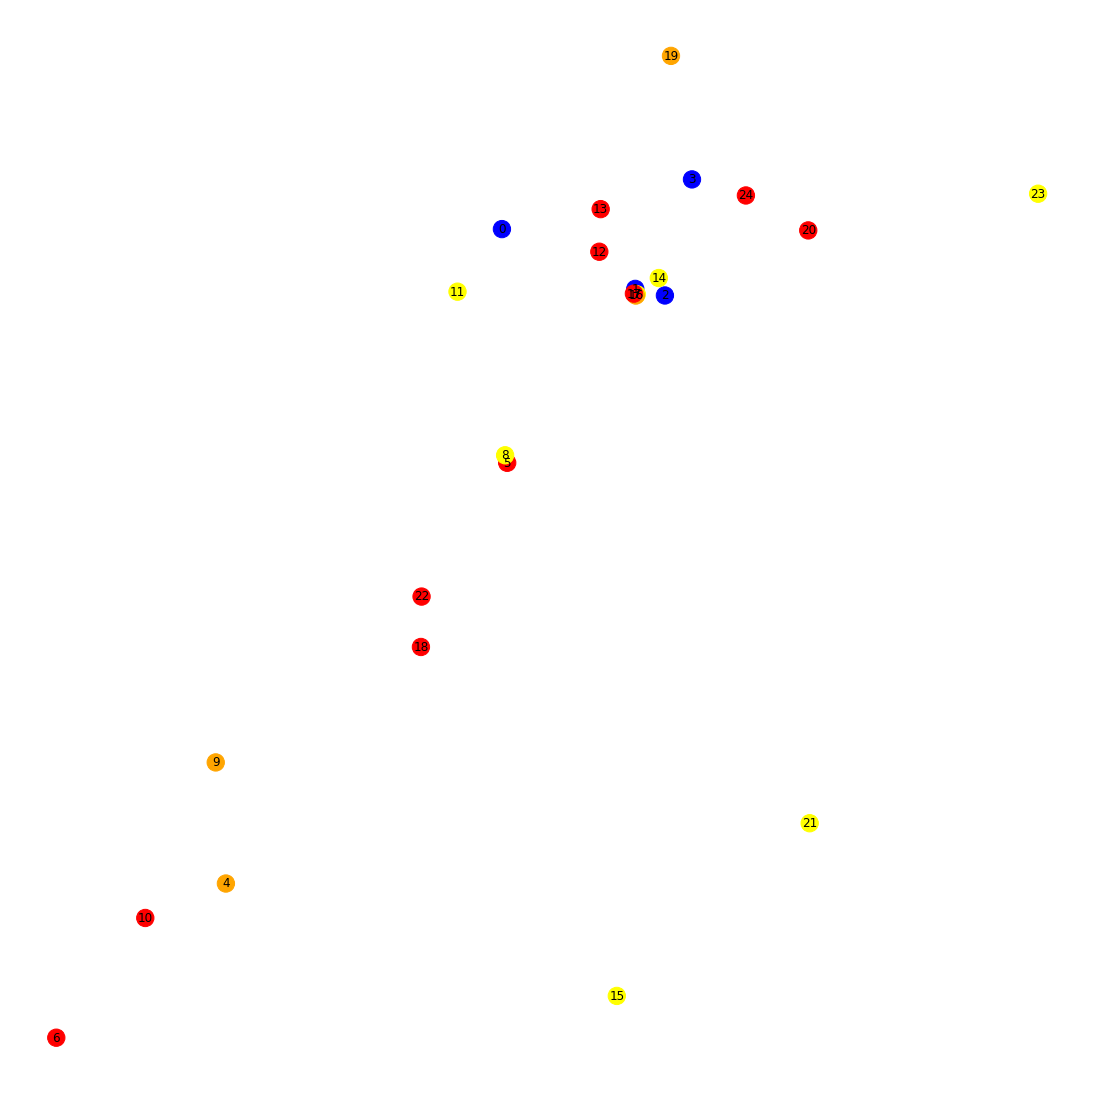

In [10]:
p = Problem("/Users/christophbleyer/Technician-Vehicle-Routing-Optimization/examples/Datasets/")
plt.rcParams["figure.figsize"]=15,15
Graph = p.plot()

# Urgency Assignment via asymetric normalized tansini affinity

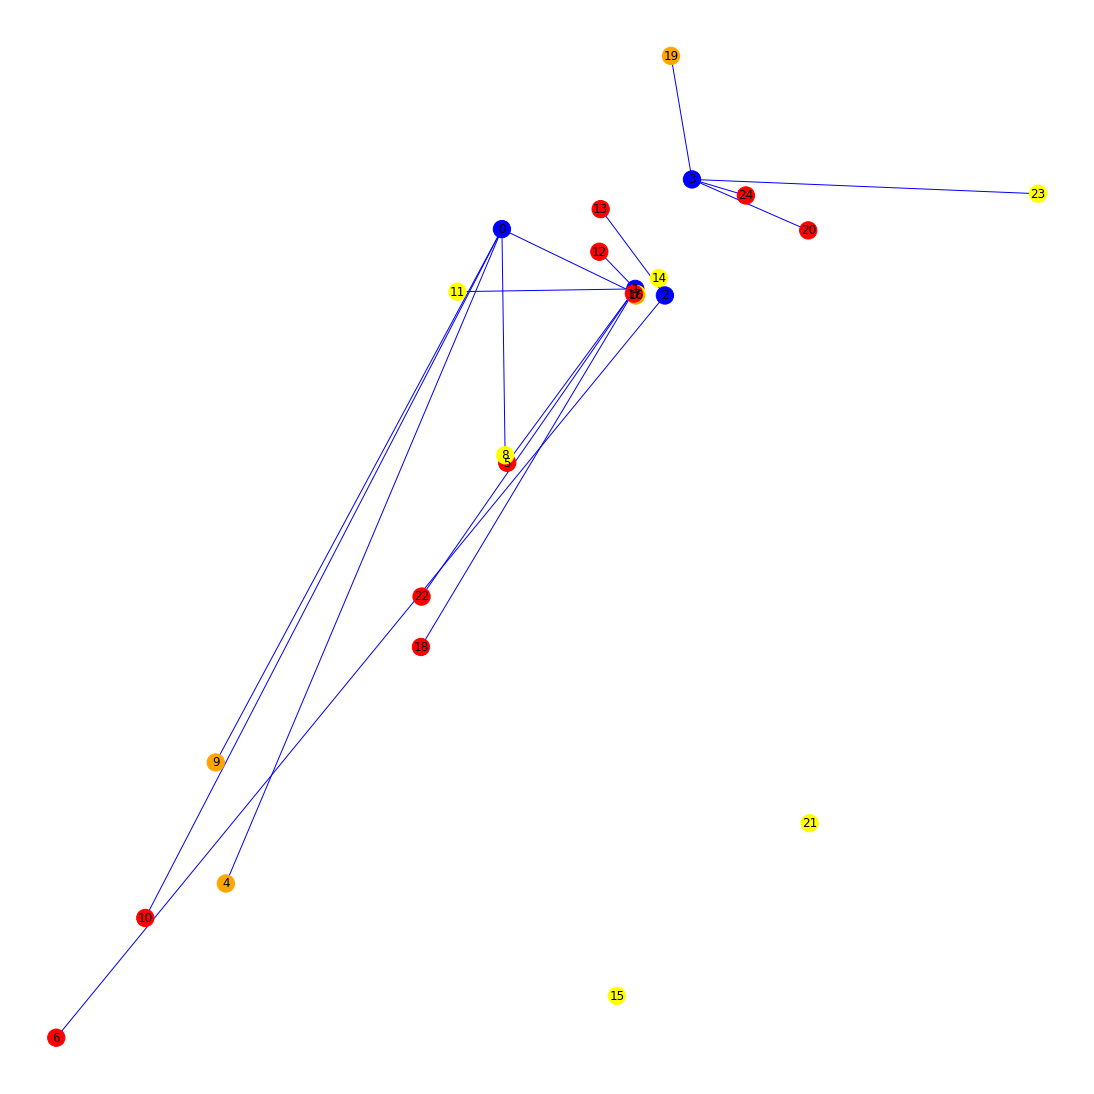

In [11]:
Graph, solution = parallelUrgencyAssignment(p, True)

In [12]:
print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(solution.problem.demand))

Percent custs in holding after clustering 0.14285714285714285


# Generalized Parallel Regret Insertion

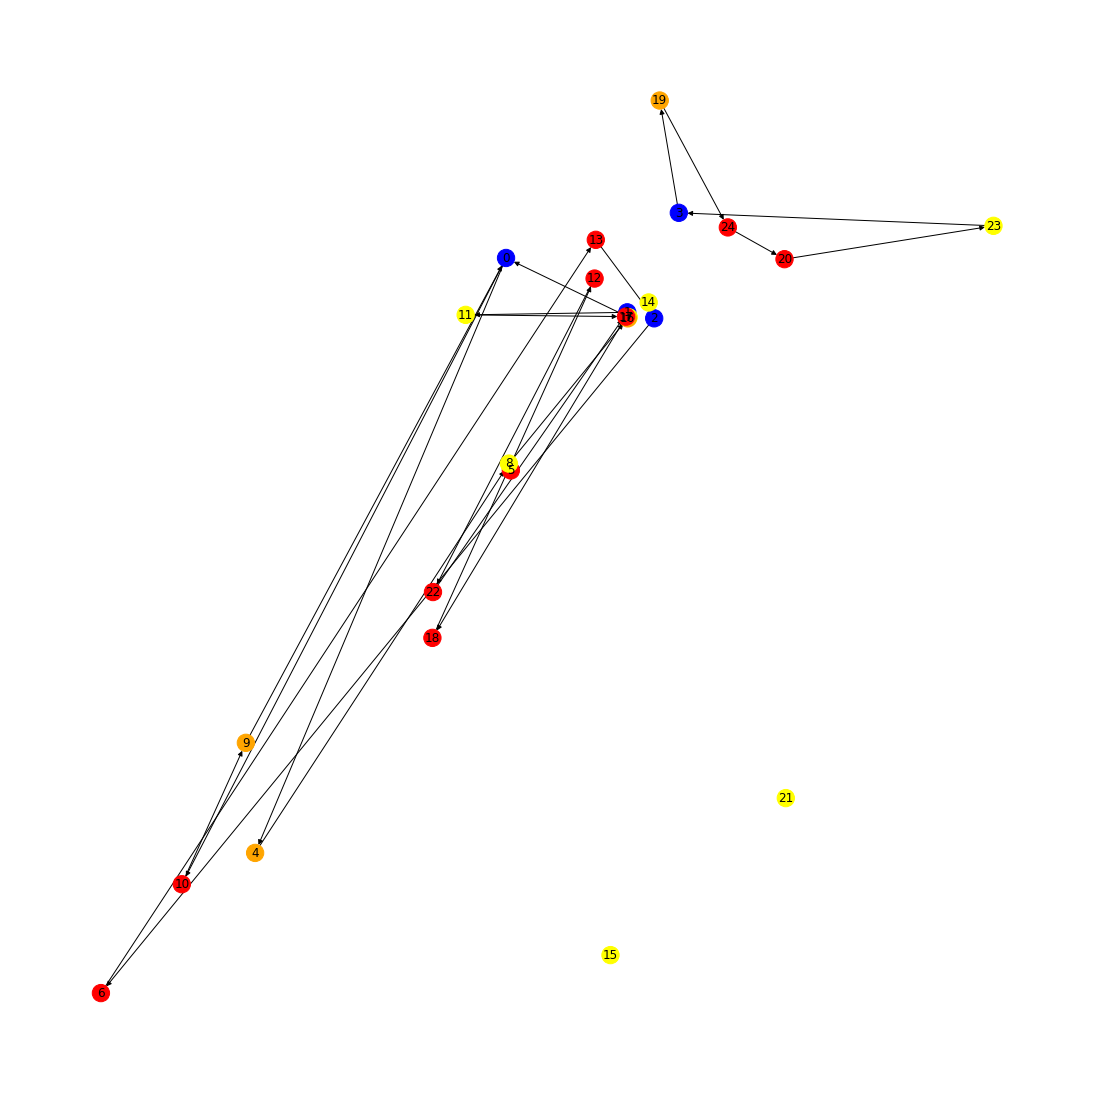

In [13]:
buildSolutionParallelStyle(solution)
Graph = solution.toGraph()

In [14]:
print(solution.objective())

print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(p.demand))

[37.0, 241684.60000000003, 10930.999999999993, 5]
Percent custs in holding after clustering 0.23809523809523808


# ALNS

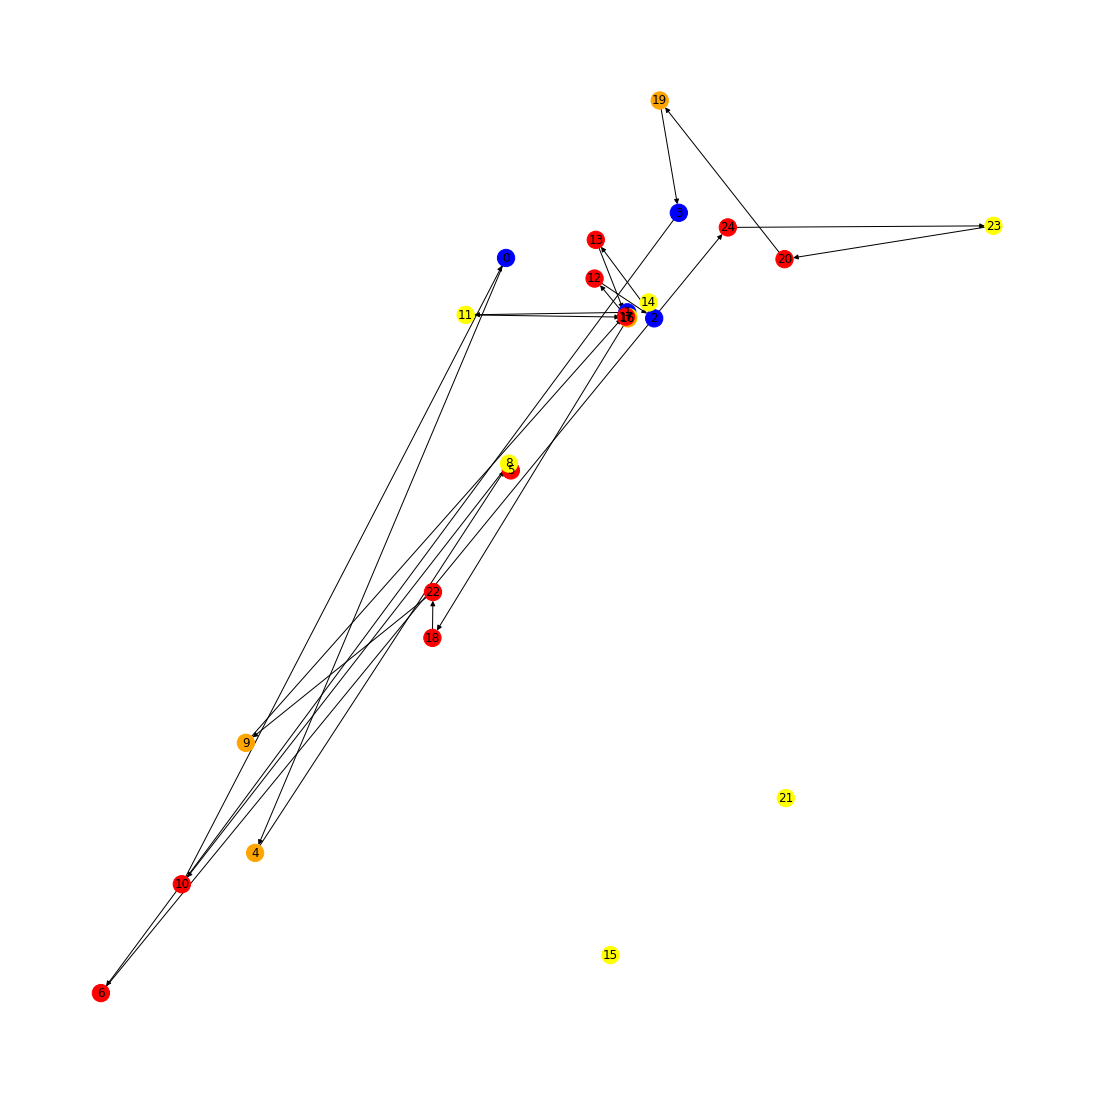

In [26]:
alns = ALNS()
alns.add_objective_comparism(objectiveCompare)
alns.add_destroy_operator(randomRemoval)
alns.add_repair_operator(greedyInsertion)
criterion = HillClimbing()

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=5000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()


In [27]:
print(optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

[37.0, 175865.4, 8808.300000000003, 4]
Percent custs in holding after alns 0.23809523809523808


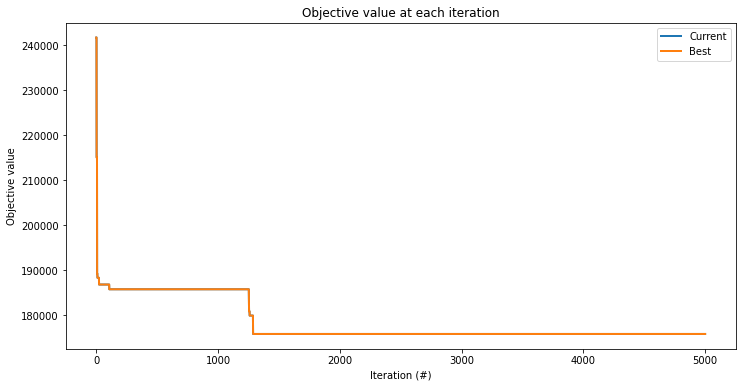

In [28]:
_, ax = plt.subplots(figsize=(12, 6))
result.plot_objectives(ax=ax, lw=2)

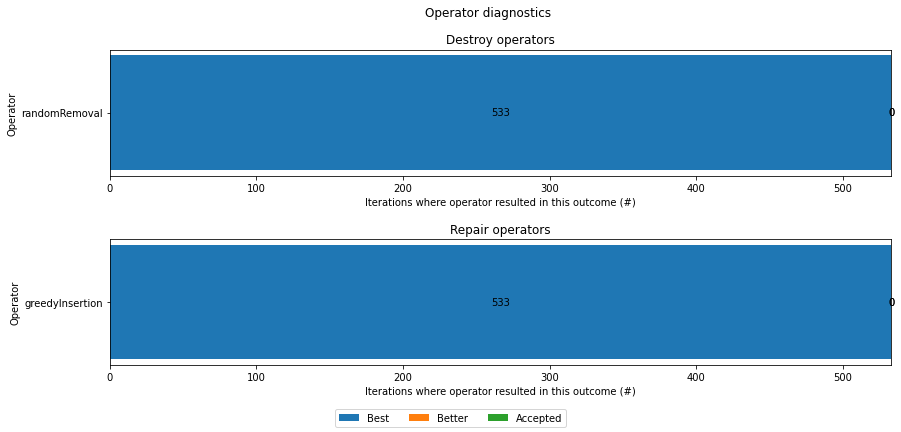

In [29]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])